In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as mticker
import datetime
import math

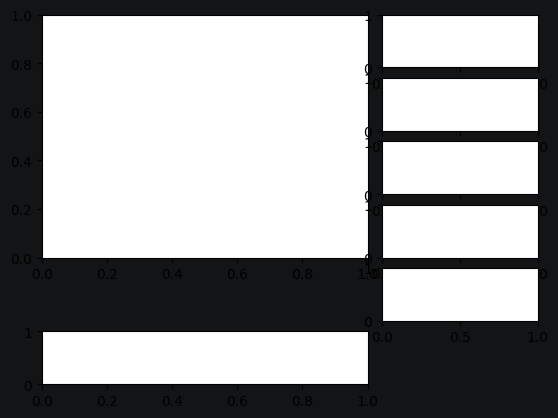

In [2]:
fig = plt.figure()
fig.patch.set_facecolor("#121416")
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax3 = fig.add_subplot(gs[1, 4:6])
ax4 = fig.add_subplot(gs[2, 4:6])
ax5 = fig.add_subplot(gs[3, 4:6])
ax6 = fig.add_subplot(gs[4, 4:6])
ax7 = fig.add_subplot(gs[5, 0:4])

In [3]:
Stock = ['IONQ', 'MSFT', "NVDA", "AAPL", "PYPL"]

def figure_design(ax):
    ax.set_facecolor("#091217")
    ax.tick_params(axis="both", labelsize = 14, colors='white')
    ax.ticklabel_format(useOffset = False)
    ax.spines['bottom'].set_color('#808080')



In [17]:
# Building CandleStick chart

def string_to_number(df, column):
    if isinstance(df.iloc[0, df.columns.get_loc(column)], str):
        df[column] = df[column].str.replace(',', "")
        df[column] = df[column].astype(float)

    return df

def read_data_ohlc(filename, stock_code, usecols):
    df = pd.read_csv(filename, header=None, usecols=usecols, names = ["time", "name", 'price', 'change', 'volume',  'target'],
                        index_col='time', parse_dates=['time'])
    index_with_nan = df.index[df.isnull().any(axis=1)]
    df.drop(index_with_nan, inplace=True) # 0 for rows
    df.index = pd.DatetimeIndex(df.index)

    df = string_to_number(df,'price')
    df = string_to_number(df,'volume')
    df = string_to_number(df,'target')

    latest_info = df.iloc[-1,:]
    latest_price = str(latest_info.iloc[0])
    latest_change = str(latest_info.iloc[1])

    df_vol = df['volume'].resample('1Min').mean() # store for later showing histogram chart

    data = df['price'].resample('1Min').ohlc()

    data['time'] = data.index
    data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')

    """data['MA5'] = data['close'].rolling(5).mean()
    data['MA10'] = data['close'].rolling(10).mean()
    data['MA20'] = data['close'].rolling(20).mean()"""

    
    data['MA1'] = data['close'].rolling(1).mean()
    data['MA2'] = data['close'].rolling(2).mean()
    data['MA3'] = data['close'].rolling(3).mean()
    
    data['volume_diff'] = df_vol.diff()
    data[data['volume_diff']<0] = None
    index_with_nan = data.index[data.isnull().any(axis=1)]
    data.drop(index_with_nan,  inplace=True)

    data.reset_index(drop=True, inplace = True)
    return data, latest_price, latest_change, df['target'].iloc[-1], df['volume'].iloc[-1]


In [5]:
time_stamp = datetime.datetime.now() - datetime.timedelta(hours=13)
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'
stock_code = Stock[0]
df = pd.read_csv(filename, header=None, usecols=[1,2,3,4,5,6],names = ["time", "name", 'price', 'change', 'volume',  'target'],
                     index_col='time', parse_dates=['time'])
index_with_nan = df.index[df.isnull().any(axis=1)]
df.drop(index_with_nan, inplace=True) # 0 for rows
df.index = pd.DatetimeIndex(df.index)

df = string_to_number(df,'price')
df = string_to_number(df,'volume')
df = string_to_number(df,'target')

latest_info = df.iloc[-1,:]
latest_price = str(latest_info.iloc[0])
latest_change = str(latest_info.iloc[1])

df_vol = df['volume'].resample('1Min').mean() # store for later showing histogram chart

data = df['price'].resample('1Min').ohlc()

data['time'] = data.index
data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')

data['MA5'] = data['close'].rolling(5).mean()
data['MA10'] = data['close'].rolling(10).mean()
data['MA20'] = data['close'].rolling(20).mean()

data['volume_diff'] = df_vol.diff()
data[data['volume_diff']<0] = None
index_with_nan = data.index[data.isnull().any(axis=1)]
data.drop(index_with_nan,  inplace=True)

data.reset_index(drop=True, inplace = True)


,open,high,low,close,time,MA5,MA10,MA20,volume_diff
0,13.2,13.2,13.2,13.2,2023-12-07 08:46:00,13.2,13.2,13.2,0.0
1,13.2,13.2,13.2,13.2,2023-12-07 08:47:00,13.2,13.2,13.2,0.0
2,13.2,13.2,13.2,13.2,2023-12-07 08:48:00,13.2,13.2,13.2,0.0
3,13.2,13.2,13.2,13.2,2023-12-07 08:49:00,13.2,13.2,13.2,0.0
4,13.2,13.2,13.2,13.2,2023-12-07 08:50:00,13.2,13.2,13.2,0.0
5,13.2,13.2,13.2,13.2,2023-12-07 08:51:00,13.2,13.2,13.2,0.0
6,13.2,13.2,13.2,13.2,2023-12-07 08:52:00,13.2,13.2,13.2,0.0
7,13.2,13.2,13.2,13.2,2023-12-07 08:53:00,13.2,13.2,13.2,0.0


In [15]:
time_stamp = datetime.datetime.now() - datetime.timedelta(hours=13)
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'
stock_code = Stock[0]
df = pd.read_csv(filename, header=None, usecols=[1,2,3,4,5,6],names = ["time", "name", 'price', 'change', 'volume',  'target'],
                     index_col='time', parse_dates=['time'])
index_with_nan = df.index[df.isnull().any(axis=1)]
df.drop(index_with_nan, inplace=True) # 0 for rows
df.index = pd.DatetimeIndex(df.index)

df = string_to_number(df,'price')
df = string_to_number(df,'volume')
df = string_to_number(df,'target')

latest_info = df.iloc[-1,:]
latest_price = str(latest_info.iloc[0])
latest_change = str(latest_info.iloc[1])

df_vol = df['volume'].resample('1Min').mean() # store for later showing histogram chart

data = df['price'].resample('1Min').ohlc()
data['time'] = data.index
data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')

"""data['MA5'] = data['close'].rolling(5).mean()
data['MA10'] = data['close'].rolling(10).mean()
data['MA20'] = data['close'].rolling(20).mean()"""

data['MA1'] = data['close'].rolling(1).mean()
data['MA2'] = data['close'].rolling(2).mean()
data['MA3'] = data['close'].rolling(3).mean()
data

,open,high,low,close,time,MA1,MA2,MA3
time,,,,,,,,
2023-12-16 02:17:00,14.93,14.93,14.93,14.93,2023-12-16 02:17:00,14.93,NaN,NaN
2023-12-16 02:18:00,14.93,14.93,14.93,14.93,2023-12-16 02:18:00,14.93,14.93,NaN
2023-12-16 02:19:00,14.93,14.93,14.93,14.93,2023-12-16 02:19:00,14.93,14.93,14.93
2023-12-16 02:20:00,14.93,14.93,14.93,14.93,2023-12-16 02:20:00,14.93,14.93,14.93
2023-12-16 02:21:00,14.93,14.93,14.93,14.93,2023-12-16 02:21:00,14.93,14.93,14.93
2023-12-16 02:22:00,14.93,14.93,14.93,14.93,2023-12-16 02:22:00,14.93,14.93,14.93
2023-12-16 02:23:00,14.93,14.93,14.93,14.93,2023-12-16 02:23:00,14.93,14.93,14.93
2023-12-16 02:24:00,14.93,14.93,14.93,14.93,2023-12-16 02:24:00,14.93,14.93,14.93


In [18]:
time_stamp = datetime.datetime.now() - datetime.timedelta(hours=13)
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'
data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], [1,2,3,4,5,6])

In [19]:
time_stamp = datetime.datetime.now() - datetime.timedelta(hours=13)
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'
data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], [1,2,3,4,5,6])

candle_counter = range(len(data['open'])-1)
ohlc = []
for candle in candle_counter:
    append_me = candle_counter[candle], data['open'][candle], data['high'][candle], data['low'][candle], data['close'][candle]
    ohlc.append(append_me)



In [20]:
ohlc

[(0, 14.93, 14.93, 14.93, 14.93),
 (1, 14.93, 14.93, 14.93, 14.93),
 (2, 14.93, 14.93, 14.93, 14.93),
 (3, 14.93, 14.93, 14.93, 14.93),
 (4, 14.93, 14.93, 14.93, 14.93),
 (5, 14.93, 14.93, 14.93, 14.93)]

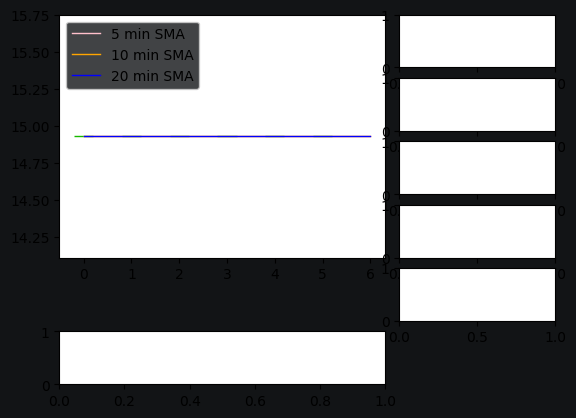

In [21]:
%matplotlib inline

fig = plt.figure()
fig.patch.set_facecolor("#121416")
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax3 = fig.add_subplot(gs[1, 4:6])
ax4 = fig.add_subplot(gs[2, 4:6])
ax5 = fig.add_subplot(gs[3, 4:6])
ax6 = fig.add_subplot(gs[4, 4:6])
ax7 = fig.add_subplot(gs[5, 0:4])
ax1.clear()
candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#18b800', colordown='#ff3503')
ax1.plot(data['MA1'],color='pink', linestyle='-', linewidth= 1, label='5 min SMA' )
ax1.plot(data['MA2'],color='orange', linestyle='-', linewidth= 1, label='10 min SMA' )
ax1.plot(data['MA3'],color='blue', linestyle='-', linewidth= 1, label='20 min SMA' )
leg = ax1.legend(loc='upper left', facecolor='#121416', fontsize=10)
plt.show()

In [22]:
# Plotting:

def animate(i):
    time_stamp = datetime.datetime.now() - datetime.timedelta(hours=13)
    time_stamp = time_stamp.strftime('%Y-%m-%d')
    filename = str(time_stamp)+ ' stock_data.csv'
    data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], [1,2,3,4,5,6])

    candle_counter = range(len(data['open'])-1)
    ohlc = []
    for candle in candle_counter:
        append_me = candle_counter[candle], data['open'][candle], data['high'][candle], data['low'][candle], data['close'][candle]
        ohlc.append(append_me)
    
    ax1.clear()
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#18b800', colordown='#ff3503')
    ax1.plot(data['MA5'],color='pink', linestyle='-', linewidth= 1, label='5 min SMA' )
    ax1.plot(data['MA10'],color='orange', linestyle='-', linewidth= 1, label='10 min SMA' )
    ax1.plot(data['MA10'],color='blue', linestyle='-', linewidth= 1, label='20 min SMA' )
    leg = ax1.legend(loc='upper left', facecolor='#121416', fontsize=10)

    for text in leg.get_texts():
        plt.setp(text, colow='w')

    figure_design(ax1)
    

In [23]:
ani = animation.FuncAnimation(fig, animate, interval=1, frames=100)
plt.show()